In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
data = pd.read_csv("/insurance.csv")


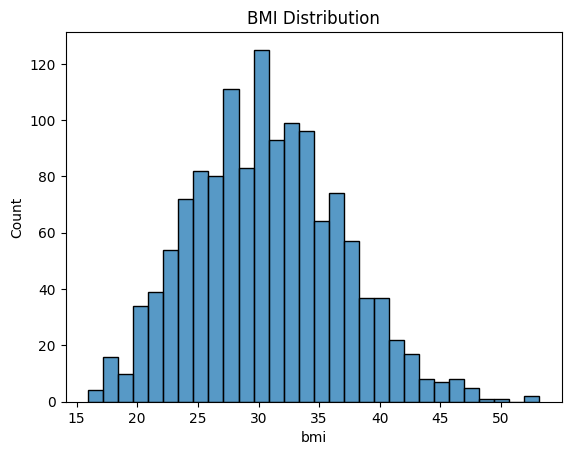

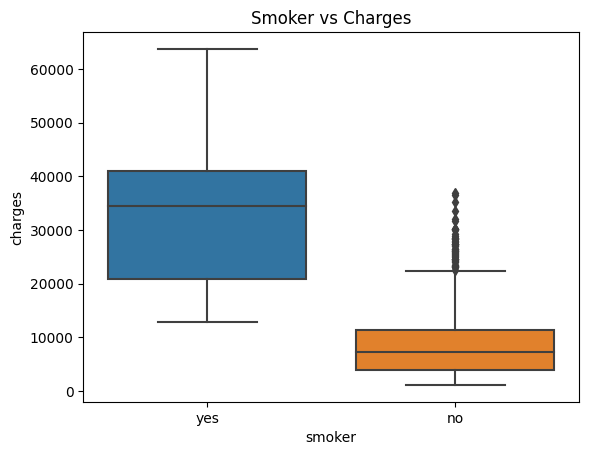

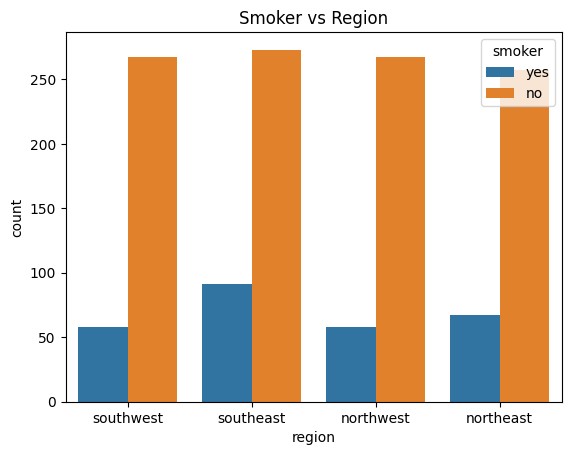

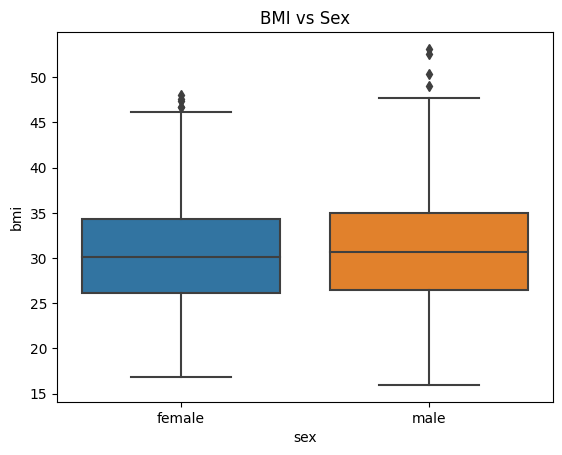

Region with most children: southeast


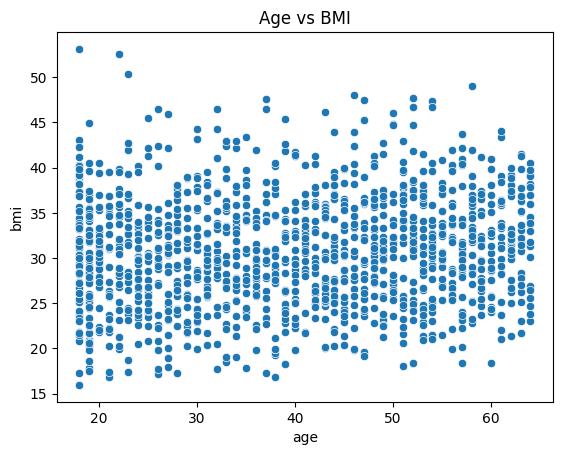

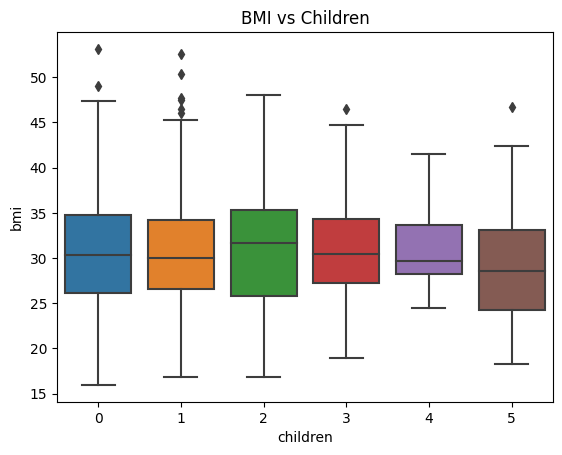

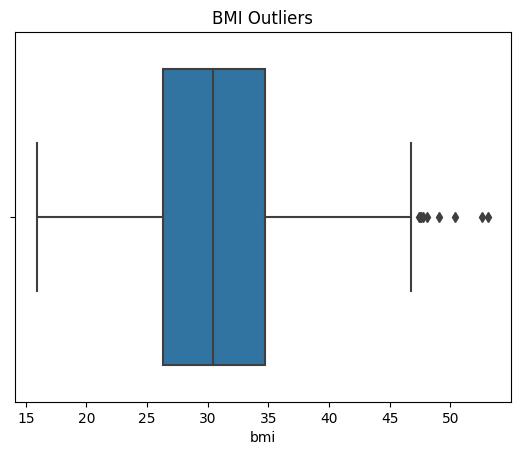

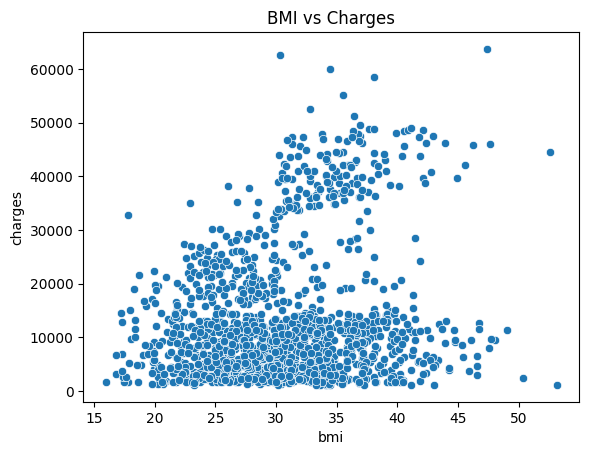

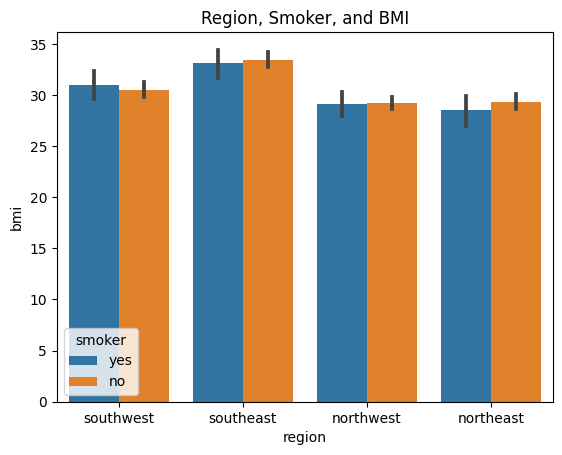

In [ ]:
# Examine the distribution of BMI
sns.histplot(data['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

# Examine the relationship between "smoker" and "charges"
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Smoker vs Charges')
plt.show()

# Examine the relationship between "smoker" and "region"
sns.countplot(x='region', hue='smoker', data=data)
plt.title('Smoker vs Region')
plt.show()

# Examine the relationship between "bmi" and "sex"
sns.boxplot(x='sex', y='bmi', data=data)
plt.title('BMI vs Sex')
plt.show()

# Find the "region" with the most "children"
region_with_most_children = data.groupby('region')['children'].sum().idxmax()
print(f'Region with most children: {region_with_most_children}')

# Examine the relationship between "age" and "bmi"
sns.scatterplot(x='age', y='bmi', data=data)
plt.title('Age vs BMI')
plt.show()

# Examine the relationship between "bmi" and "children"
sns.boxplot(x='children', y='bmi', data=data)
plt.title('BMI vs Children')
plt.show()

# Check for outliers in "bmi"
sns.boxplot(x=data['bmi'])
plt.title('BMI Outliers')
plt.show()

# Examine the relationship between "bmi" and "charges"
sns.scatterplot(x='bmi', y='charges', data=data)
plt.title('BMI vs Charges')
plt.show()

# Examine the relationship between "region", "smoker", and "bmi" using a bar plot
sns.barplot(x='region', y='bmi', hue='smoker', data=data)
plt.title('Region, Smoker, and BMI')
plt.show()


In [ ]:
# Encode categorical variables
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data = pd.get_dummies(data, columns=['region'], drop_first=True)

# Split dataset into X_train, X_test, y_train, y_test
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the dataset (you can choose Min-Max or Standard Scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Initialize and train regression models
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42))
]

for model_name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f'{model_name} RMSE: {rmse_scores.mean()} (+/- {rmse_scores.std()})')


Linear Regression RMSE: 6147.093944016903 (+/- 401.4063928973523)
Random Forest RMSE: 4952.815215286888 (+/- 480.6086760037936)


In [ ]:
# Optimize hyperparameters for the selected model (Random Forest in this example)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_


In [ ]:
# Evaluate the optimized model
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 20764248.005294673
Mean Absolute Error: 2518.5012851445563
